# Differential equation for vector-valued functions

MAT1120, September 10, 2024

In [1]:
%matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from ipywidgets import interact

In [3]:
import numpy as np
from scipy.linalg import expm

## Contracting dynamics

define the coefficient matrix $A$<br>
<pre>
A = [ [ -1.5, 0.5 ],
      [    1,  -1 ] ]
</pre>

In [4]:
A = np.matrix([[-1.5, 0.5],
               [   1,  -1]])

set up the shared time interval

In [5]:
# generate t-values, from t = 0 to t = T
T = 15
t_cnt = 100
tvar = np.linspace(0,T,t_cnt)

compute $\exp(t A) v_0$ for the initial value (column vector)
<pre>
v_0 = [ [ 1 ],
        [ 0 ] ]
</pre>
and plot the development

In [6]:
v0 = np.matrix([[1],[0]])
v_array = [expm(tval * A) @ v0 for tval in tvar]
# get x- and y-coordinates from the list
vxvar = [vi[0,0] for vi in v_array]
vyvar = [vi[1,0] for vi in v_array]

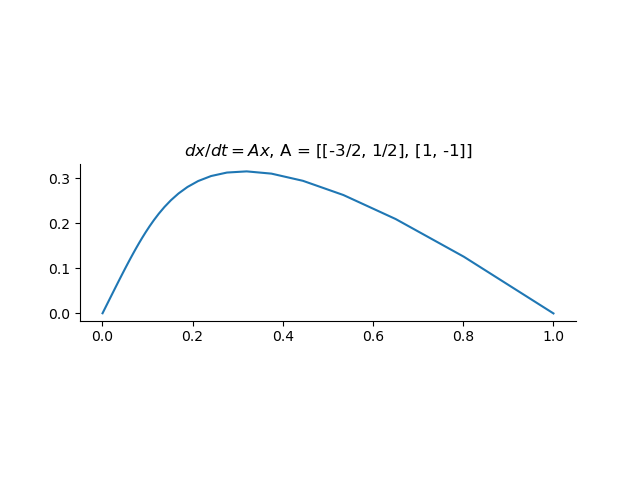

In [7]:
# set up drawing context
fig1, ax1 = plt.subplots()

ax1.set_aspect('equal')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title(r'$dx / dt = A x$, A = [[-3/2, 1/2], [1, -1]]')
# return value of plat is an array of Line2D objects
# retain the first (and only) one in in this list to manipulate the data
grph = ax1.plot(vxvar, vyvar)[0]

def update_func(frame_num):
    # Updates the frame
    # grph is the Line2D object in the current plot conetxt
    # update its data to contain the first frame_num points of the plot
    grph.set_xdata(vxvar[0:frame_num])
    grph.set_ydata(vyvar[0:frame_num])
    return [grph]

anim = anm.FuncAnimation(fig=fig1, func=update_func, frames=t_cnt, repeat=True, blit=True)
plt.show()

add more initial values and make in interactive plot (change the stop time)

In [8]:
u0 = np.matrix([[1],[0.5]])
u_array = [expm(tval * A) @ u0 for tval in tvar]
uxvar = [ui[0,0] for ui in u_array]
uyvar = [ui[1,0] for ui in u_array]
w0 = np.matrix([[1],[1]])
w_array = [expm(tval * A) @ w0 for tval in tvar]
wxvar = [wi[0,0] for wi in w_array]
wyvar = [wi[1,0] for wi in w_array]

In [9]:
fig2, _ = plt.subplots()

def show_graph1(t_lim):
    plt.figure(fig2)
    plt.clf()
    v_grph = plt.plot(vxvar[0:t_lim], vyvar[0:t_lim], color='r')[0]
    u_grph = plt.plot(uxvar[0:t_lim], uyvar[0:t_lim], color='g')[0]
    w_grph = plt.plot(wxvar[0:t_lim], wyvar[0:t_lim], color='b')[0]
    cur_ax = plt.gca()
    cur_ax.set_aspect('equal')
    cur_ax.spines['top'].set_visible(False)
    cur_ax.spines['right'].set_visible(False)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.show()

interact(show_graph1, t_lim=(1,30))

interactive(children=(IntSlider(value=15, description='t_lim', max=30, min=1), Output()), _dom_classes=('widge…

<function __main__.show_graph1(t_lim)>

similar plot with a lot of initial values

In [10]:
init_vecs = [np.matrix([[1],[0]]),
             np.matrix([[1],[0.5]]),
             np.matrix([[0.5],[1]]),
             np.matrix([[0],[-0.5]]),
             np.matrix([[-0.5],[1]]),
             np.matrix([[0.5],[-0.5]])]
vecs_at_ts = [[expm(tval * A) @ init_vec for tval in tvar] for init_vec in init_vecs]

In [11]:
fig3, _ = plt.subplots()

def show_graph2(t_lim):
    plt.figure(fig3)
    plt.clf()
    for vec_time_dev in vecs_at_ts:
        x_coords = [vec[0,0] for vec in vec_time_dev[0:t_lim]]
        y_coords = [vec[1,0] for vec in vec_time_dev[0:t_lim]]
        plt.plot(x_coords, y_coords)
    cur_ax = plt.gca()
    cur_ax.set_aspect('equal')
    cur_ax.spines[['top', 'right']].set_visible(False)
    cur_ax.spines[['left', 'bottom']].set_position('zero')
    plt.show()

interact(show_graph2, t_lim=(2,30))

interactive(children=(IntSlider(value=16, description='t_lim', max=30, min=2), Output()), _dom_classes=('widge…

<function __main__.show_graph2(t_lim)>

get the eigenvalues and normalized eigenvectors of A

In [12]:
eig_vals, eig_vec_mat = np.linalg.eig(A)
print("eigenvalues: %s" % eig_vals)
print("eigenvectors (columns):\n%s" % eig_vec_mat)

eigenvalues: [-2.  -0.5]
eigenvectors (columns):
[[-0.70710678 -0.4472136 ]
 [ 0.70710678 -0.89442719]]


## Hyperbolic dynamics

matrix with positive and negative eigenvalues
<pre>
B = [ [ 4, -5 ],
      [ -2, 1 ] ]
</pre>

In [13]:
B = np.matrix([[ 4, -5],
               [ -2, 1]])

In [14]:
eig_vals, eig_vec_mat = np.linalg.eig(B)
print("eigenvalues: %s" % eig_vals)
print("eigenvectors (columns):\n%s" % eig_vec_mat)

eigenvalues: [ 6. -1.]
eigenvectors (columns):
[[ 0.92847669  0.70710678]
 [-0.37139068  0.70710678]]


In [15]:
# work with smaller max time Tp
Tp = 4
tp_cnt = 100
tpvar = np.linspace(0,Tp,tp_cnt)

contracting direction for the negative eigenvalue -1

In [16]:
vp0 = np.matrix([[1],[1]])

In [17]:
vp_array = [expm(tval * B) @ vp0 for tval in tpvar]
# get x- and y-coordinates from the list
vpxvar = [vi[0,0] for vi in vp_array]
vpyvar = [vi[1,0] for vi in vp_array]

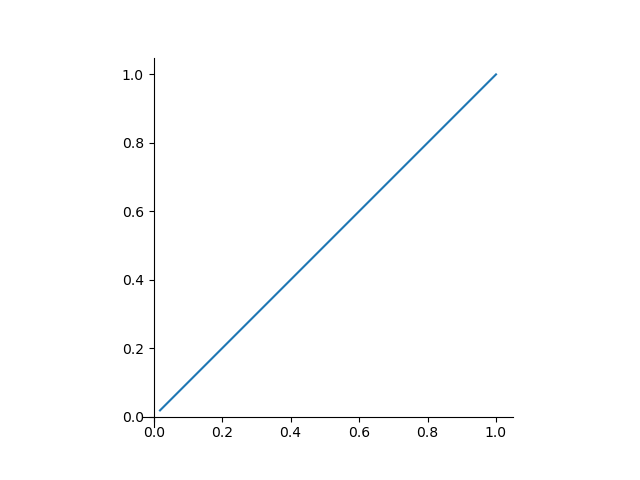

In [18]:
# set up drawing context
fig4, ax4 = plt.subplots()

# return value of plat is an array of Line2D objects
# retain the first (and only) one in in this list to manipulate the data
grph1 = ax4.plot(vpxvar, vpyvar)[0]
ax4.set_aspect('equal')
ax4.spines[['top', 'right']].set_visible(False)
ax4.spines[['left', 'bottom']].set_position('zero')

def update_func2(frame_num):
    # Updates the frame
    # grph is the Line2D object in the current plot conetxt
    # update its data to contain the first frame_num points of the plot
    grph.set_xdata(vpxvar[0:frame_num])
    grph.set_ydata(vpyvar[0:frame_num])
    return [grph]

anim2 = anm.FuncAnimation(fig=fig4, func=update_func2, frames=tp_cnt, repeat=True, blit=True)
plt.show()

In [19]:
init_vecs2 = [np.matrix([[1],[1]]),
             np.matrix([[1.01],[1]]),
             np.matrix([[0.99],[1]]),
             np.matrix([[0.4],[0.41]]),
             np.matrix([[0.6],[0.61]]),
             np.matrix([[-0.05],[0.02]]),
             np.matrix([[1.05],[1]])]
vecs_at_ts2 = [[expm(tval * B) @ init_vec for tval in tpvar] for init_vec in init_vecs2]

<IPython.core.display.Javascript object>


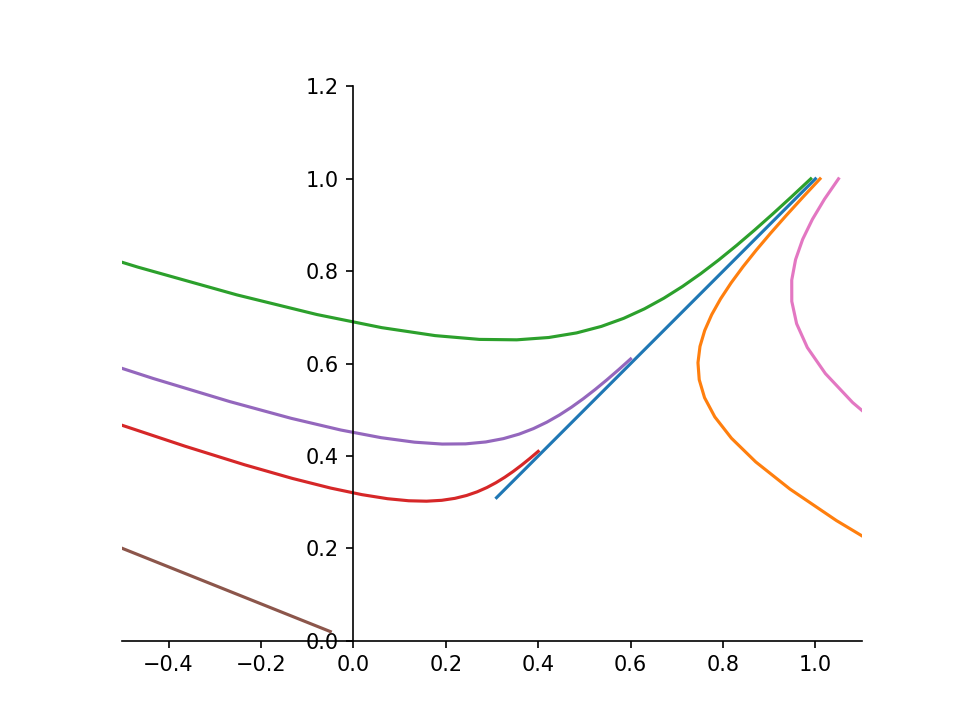

interactive(children=(IntSlider(value=16, description='tp_lim', max=30, min=2), Output()), _dom_classes=('widg…

<function __main__.show_graph3(tp_lim)>

In [20]:
fig5,ax5 = plt.subplots()

def show_graph3(tp_lim):
    plt.figure(fig5)
    plt.clf()
    for vec_seq in vecs_at_ts2:
        x_coords = [vec[0,0] for vec in vec_seq[0:tp_lim]]
        y_coords = [vec[1,0] for vec in vec_seq[0:tp_lim]]
        plt.plot(x_coords, y_coords)
    plt.xlim((-0.5,1.1))
    plt.ylim((0.0,1.2))
    cur_ax = plt.gca()
    cur_ax.set_aspect('equal')
    cur_ax.spines[['top', 'right']].set_visible(False)
    cur_ax.spines[['left', 'bottom']].set_position('zero')
    plt.show()

interact(show_graph3, tp_lim=(2,30))